## \#0 Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# Link to kaggle dataset
# https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data/
df = pd.read_csv('./data/vehicles.csv')
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [3]:
# feel for what we have
for c in df.columns:
  print(c,len(df[c].unique()))

# to throw away
  # id, vin, region_url, county, image_url, lat, long

id 426880
url 426880
region 404
region_url 413
price 15655
year 115
manufacturer 43
model 29668
condition 7
cylinders 9
fuel 6
odometer 104871
title_status 7
transmission 4
VIN 118265
drive 4
size 5
type 14
paint_color 13
image_url 241900
description 360912
county 1
state 51
lat 53182
long 53773
posting_date 381537


In [4]:
df.drop(columns=['id', 'VIN', 'region_url','county', 'image_url', 'lat','long'],inplace=True)
df.head()

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state,posting_date
0,https://prescott.craigslist.org/cto/d/prescott...,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN
1,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN
2,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN
3,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN
4,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN


#### Initial Investiagion

Some weird things I noticed:
- 115 years? (whats the range of age of cars?)
- 13 colors? (seems small)
- 1 county (probably just going to throw column out)

#### Listing Potentially Useful rows


In [5]:
# List of Manufacturers
df.manufacturer.value_counts()[:5]

manufacturer
ford         70985
chevrolet    55064
toyota       34202
honda        21269
nissan       19067
Name: count, dtype: int64

In [6]:
# List of Cylinder Types
df.cylinders.value_counts()

cylinders
6 cylinders     94169
4 cylinders     77642
8 cylinders     72062
5 cylinders      1712
10 cylinders     1455
other            1298
3 cylinders       655
12 cylinders      209
Name: count, dtype: int64

In [7]:
df.fuel.value_counts()

fuel
gas         356209
other        30728
diesel       30062
hybrid        5170
electric      1698
Name: count, dtype: int64

In [8]:
df.region.value_counts()
# drop cause... weird.

region
columbus                   3608
jacksonville               3562
spokane / coeur d'alene    2988
eugene                     2985
fresno / madera            2983
                           ... 
meridian                     28
southwest MS                 14
kansas city                  11
fort smith, AR                9
west virginia (old)           8
Name: count, Length: 404, dtype: int64

In [9]:
df.condition.value_counts()

condition
good         121456
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: count, dtype: int64

In [10]:
# drop b/c we have model/make
df['size'].value_counts()

size
full-size      63465
mid-size       34476
compact        19384
sub-compact     3194
Name: count, dtype: int64

In [11]:
df['type'].value_counts()

type
sedan          87056
SUV            77284
pickup         43510
truck          35279
other          22110
coupe          19204
hatchback      16598
wagon          10751
van             8548
convertible     7731
mini-van        4825
offroad          609
bus              517
Name: count, dtype: int64

<Axes: >

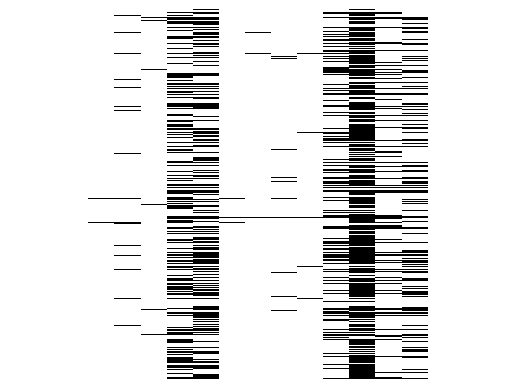

In [12]:
sns.heatmap(df.isnull(),yticklabels=False,xticklabels=False,cbar=False,cmap='Greys')


In [13]:

emptiness = pd.DataFrame()

for feature in df.columns:
    emptiness[feature] = [df[feature].isna().sum()/len(df[feature])]

emptiness



,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state,posting_date
0,0.0,0.0,0.0,0.002823,0.041337,0.012362,0.407852,0.416225,0.007058,0.010307,0.019308,0.005988,0.305863,0.717675,0.217527,0.305011,0.000164,0.0,0.000159


In [14]:
rowsBeforeCleaning = len(df)
print("#Rows:",rowsBeforeCleaning)

#Rows: 426880


### Clean Up Data

Special Cases
- Cylinder: data is ~40% missing, but is potentially not an important feature (potentially drop)
- Condition: data is ~40% missing, but critical to pricing, so we'll drop rows where null
- Drive: data is ~30% missing, drop where null
- Size: data is ~70% missing, potentially drop entire col
- Type: data is ~20% missing, potentially drop (inferred from manufacture/model)
- Paint_Color data is ~30% missing, drop (heard a thing once about it affect pricing, lol)

Less Serious Cases:
- Drop rows where null because so few are missing: 
  - year
  - manufacturer
  - model
  - fuel
  - odometer
  - title_status 
  - transmission
  - description
  - posting_date


In [15]:
# drop these cols
df.drop(columns=['size'],axis=1,inplace=True)

# drop rows where any of these features are NA
toDrop = ['cylinders','condition','drive','type','paint_color',
          'year','manufacturer','model','fuel','odometer','title_status','transmission','description','posting_date'
          ] 
df.dropna(subset=toDrop,inplace=True)


In [16]:
emptiness = pd.DataFrame()

for feature in df.columns:
    emptiness[feature] = [df[feature].isna().sum()/len(df[feature])]

emptiness

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,description,state,posting_date
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
print("#Rows Previous: {}, #Rows Current: {}, Loss%: {}".format(rowsBeforeCleaning,len(df), 1- (len(df)/rowsBeforeCleaning) ))
print('#Features {}'.format(len(df.columns)))
print('Ratio of #Rows to #Features {}'.format(len(df)/len(df.columns)))

#Rows Previous: 426880, #Rows Current: 115988, Loss%: 0.7282889805097451
#Features 18
Ratio of #Rows to #Features 6443.777777777777


### Recap
👍 Cleaned Up Qualitative Data.

👍 Plenty of rows.

👍 Plenty of features.

👎 Might need to go back and clean up things like 'other' or 'none'

Moving on to quantitative data.

In [18]:
# idenitifying numerical data
df.info()

# price, year, odometer are numerical

<class 'pandas.core.frame.DataFrame'>
Index: 115988 entries, 31 to 426878
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   url           115988 non-null  object 
 1   region        115988 non-null  object 
 2   price         115988 non-null  int64  
 3   year          115988 non-null  float64
 4   manufacturer  115988 non-null  object 
 5   model         115988 non-null  object 
 6   condition     115988 non-null  object 
 7   cylinders     115988 non-null  object 
 8   fuel          115988 non-null  object 
 9   odometer      115988 non-null  float64
 10  title_status  115988 non-null  object 
 11  transmission  115988 non-null  object 
 12  drive         115988 non-null  object 
 13  type          115988 non-null  object 
 14  paint_color   115988 non-null  object 
 15  description   115988 non-null  object 
 16  state         115988 non-null  object 
 17  posting_date  115988 non-null  object 
dtypes: float

## Price Distribution

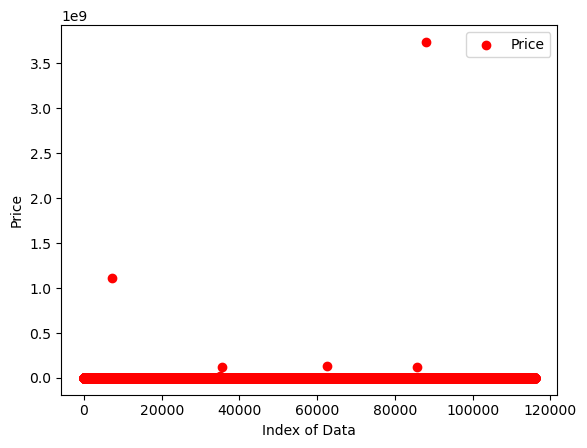

In [19]:
num_df = df

plt.scatter(x=range(len(num_df)),y=num_df['price'].values,color='red',label='Price')
# plt.hist(num_df['price'],bins='auto')

plt.ylabel('Price')
plt.xlabel("Index of Data")

plt.legend()
plt.show()

#### Data Looks Bad, aka Drop Outliers

I only considered low outliers (cars listed at $0 for algorithim reasons), but hadn't considered cars listed at absurd prices, trying again with arbitrary cut off should help reveal data shape.

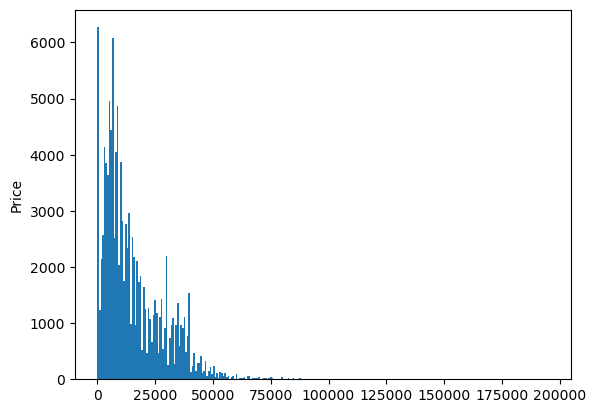

In [20]:
# arbitrary cut off on price from domain knowledge
num_df = df[df.price < 200000] 

# plt.scatter(x=range(len(num_df)),y=num_df['price'].sort_values(),color='red',label='Price')
plt.hist(num_df['price'],bins='auto')

plt.ylabel('Price')

# plt.legend()
plt.show()

#### Distribution Shape

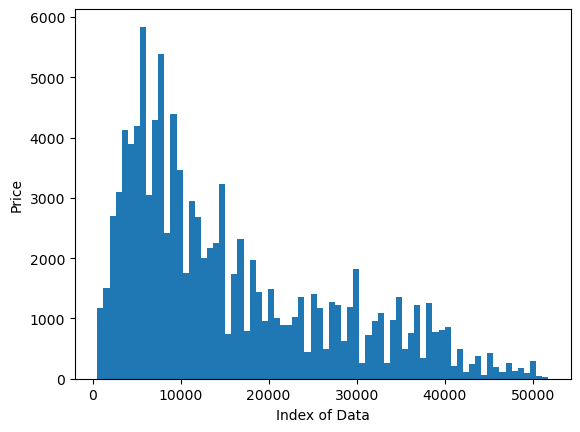

In [21]:
# df['price'].describe()

# arbitrary cut off from elbow of previous graph
df = df[df['price']<200000]
# ditto, other direction
df = df[df['price']>500]

# Empirical rule says 3 standard deviations from mean covers 99.7% of data.
std = df['price'].std()
median = df['price'].median()
empiricalRuleDst = 3*std

df = df[(df['price'] < median+empiricalRuleDst) &
         (df['price'] > median-empiricalRuleDst)]

# plt.scatter(x=range(len(df)),y=df['price'].sort_values(),color='red',label='Price')
plt.hist(df['price'],bins='auto')

plt.ylabel('Price')
plt.xlabel("Index of Data")

# plt.legend()
plt.show()

## Year Distribution

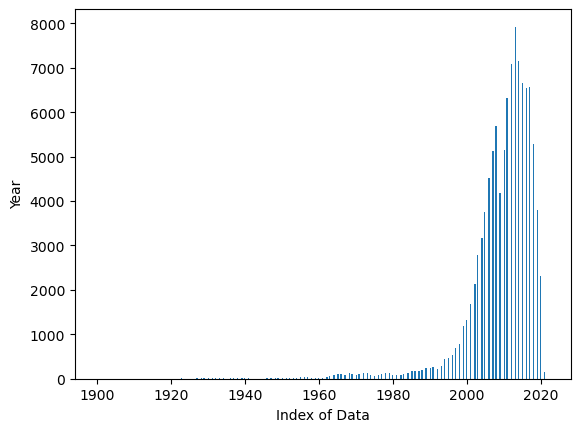

In [22]:
num_df = df

# plt.scatter(x=range(len(num_df)),y=num_df['year'].sort_values(),color='green',label='Year')
plt.hist(df['year'],bins='auto')
plt.ylabel('Year')
plt.xlabel("Index of Data")

# plt.legend()
plt.show()

Using the empirical rule again to determine best cut off for data

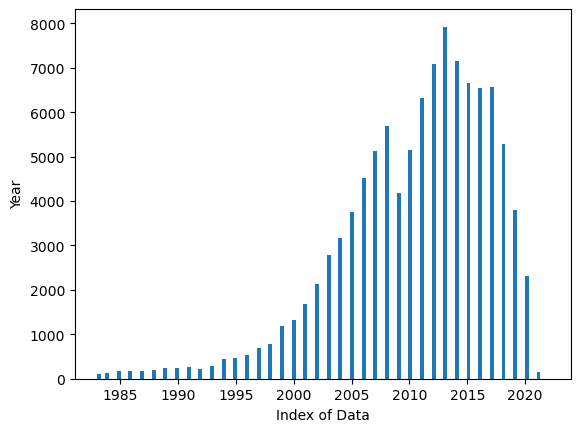

In [23]:

# Empirical rule says 3 standard deviations from mean covers 99.7% of data.
std = df['year'].std()
median = df['year'].median()
empiricalRuleDst = 3*std

df = df[(df['year'] < median+empiricalRuleDst) &
         (df['year'] > median-empiricalRuleDst)]

# plt.scatter(x=range(len(df)),y=df['year'].sort_values(),color='green',label='Year')
plt.hist(df['year'],bins='auto')

plt.ylabel('Year')
plt.xlabel("Index of Data")

# plt.legend()
plt.show()

## Mileage (Odometer) Distribution

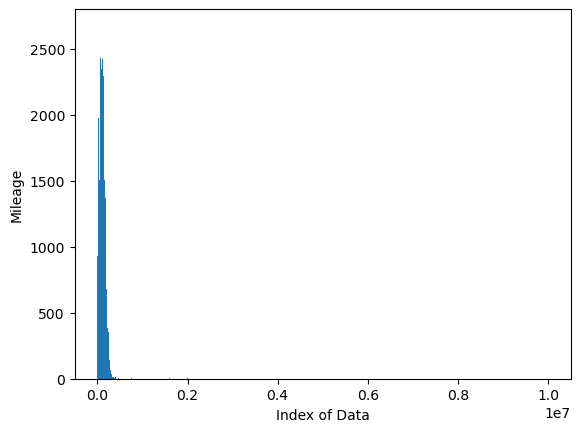

In [24]:
num_df = df

# plt.scatter(x=range(len(num_df)),y=num_df['odometer'].sort_values(),color='blue',label='Mileage')
plt.hist(df['odometer'],bins='auto')
plt.ylabel('Mileage')
plt.xlabel("Index of Data")

# plt.legend()
plt.show()

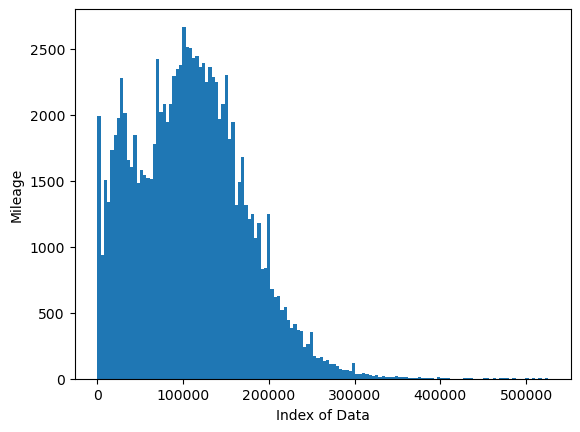

In [25]:
# Empirical rule says 3 standard deviations from mean covers 99.7% of data.
std = df['odometer'].std()
median = df['odometer'].median()
empiricalRuleDst = 3*std

df = df[(df['odometer'] < median+empiricalRuleDst) &
         (df['odometer'] > median-empiricalRuleDst)]

# plt.scatter(x=range(len(df)),y=df['odometer'].sort_values(),color='blue',label='Mileage')
plt.hist(df['odometer'],bins='auto')

plt.ylabel('Mileage')
plt.xlabel("Index of Data")

# plt.legend()
plt.show()

Domain Knowledge sugests we hard cut-off at 300k miles. Anything past that is just an outlier of a listing in a practical sense.

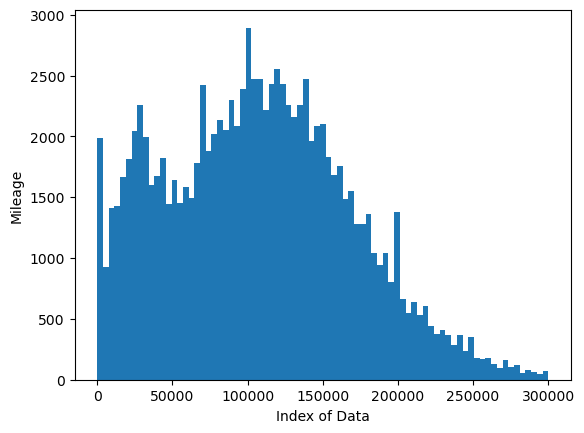

In [26]:
df = df[df['odometer']<300000]
# plt.scatter(x=range(len(df)),y=df['odometer'].sort_values(),color='blue',label='Mileage')
plt.hist(df['odometer'],bins='auto')
plt.ylabel('Mileage')
plt.xlabel("Index of Data")

# plt.legend()
plt.show()

## One Hot Encoding
For the qualitative data from before.

In [27]:
df.info()
onehot_cols = ['manufacturer','model','condition','cylinders',
               'fuel','title_status','transmission','drive','type','paint_color','state']

#drop unused
unused = ['region','description','url','posting_date']

df.drop(columns=unused,inplace=True)

# hold off on this
# df = pd.get_dummies(df,columns=onehot_cols)

<class 'pandas.core.frame.DataFrame'>
Index: 104840 entries, 31 to 426878
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   url           104840 non-null  object 
 1   region        104840 non-null  object 
 2   price         104840 non-null  int64  
 3   year          104840 non-null  float64
 4   manufacturer  104840 non-null  object 
 5   model         104840 non-null  object 
 6   condition     104840 non-null  object 
 7   cylinders     104840 non-null  object 
 8   fuel          104840 non-null  object 
 9   odometer      104840 non-null  float64
 10  title_status  104840 non-null  object 
 11  transmission  104840 non-null  object 
 12  drive         104840 non-null  object 
 13  type          104840 non-null  object 
 14  paint_color   104840 non-null  object 
 15  description   104840 non-null  object 
 16  state         104840 non-null  object 
 17  posting_date  104840 non-null  object 
dtypes: float

In [28]:
df.nunique()

price            4619
year               40
manufacturer       41
model           10198
condition           6
cylinders           8
fuel                5
odometer        34414
title_status        6
transmission        3
drive               3
type               13
paint_color        12
state              51
dtype: int64

Kinda an absurd amount of Models? Let's investigate

In [29]:
df.model.value_counts()

model
f-150                    1654
silverado 1500           1422
1500                      926
camry                     847
accord                    797
                         ... 
qx56 awd                    1
r 320 r320 bluetec          1
insight lx                  1
c300 c-300 luxury awd       1
gand wagoneer               1
Name: count, Length: 10198, dtype: int64

In [30]:
# Export model list cause it's a mess.

df.model.unique()

df.model.sort_values().to_csv('models.csv',index=True)

The data for models is sporadic and messy, instead we're going to stick with those labels that have a certain number of instances higher than some threshold count.

In [31]:
# a lot of models only show up a couple times, 
# this snippet filters out models referenced less than 100 times

vc = df['model'].value_counts()
to_remove = vc[vc < 100].index
df = df[~df['model'].isin(to_remove)]

# df.model.value_counts()
len(df)

49072

In [32]:
df = pd.get_dummies(df,columns=onehot_cols)
df.head()
print(df.columns)

Index(['price', 'year', 'odometer', 'manufacturer_acura', 'manufacturer_audi',
       'manufacturer_bmw', 'manufacturer_buick', 'manufacturer_cadillac',
       'manufacturer_chevrolet', 'manufacturer_chrysler',
       ...
       'state_sd', 'state_tn', 'state_tx', 'state_ut', 'state_va', 'state_vt',
       'state_wa', 'state_wi', 'state_wv', 'state_wy'],
      dtype='object', length=334)


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49072 entries, 31 to 426874
Columns: 334 entries, price to state_wy
dtypes: bool(331), float64(2), int64(1)
memory usage: 17.0 MB


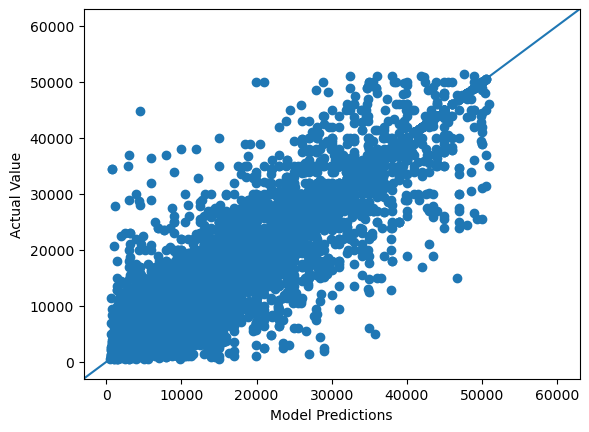

In [34]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

y = df['price']
X = df.drop(['price'],axis=1)

dtModel1 = DecisionTreeRegressor()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
dtModel1.fit(X_train,y_train) 

y_pred = dtModel1.predict(X_test)
plt.scatter(y_pred,y_test)
plt.xlabel('Model Predictions')
plt.ylabel('Actual Value')
plt.axline((0,0),(60000,60000))

In [35]:
m1Stats = {
    'MAE':metrics.mean_absolute_error(y_test, y_pred),
    'MSE':metrics.mean_squared_error(y_test, y_pred),
    'RMSE':np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
    'R2E':metrics.r2_score(y_test, y_pred)
}
m1Stats

{'MAE': 1882.421592927197,
 'MSE': 13424680.080903962,
 'RMSE': 3663.9705349393794,
 'R2E': 0.9044700897007302}

Only 6 have an importance value greater than our threshold of 0.05.


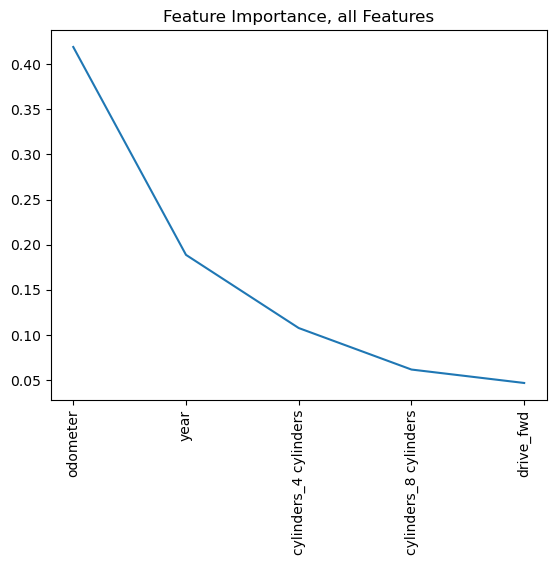

In [36]:
import bisect

# we'll disregard values that have an importance below this threshold
threshold = 0.05

# sort values so we can do bisect on it 
values = sorted(dtModel1.feature_importances_)

# get the number of columns, subtract from the bisect index from the left.
# this way we get the number of indexes greater than the threshold.
thresholdIndex = len(df.columns)-bisect.bisect_right(values,threshold)

print("Only {} have an importance value greater than our threshold of {}.".format(thresholdIndex+1,threshold))

names = []
importances = []

for importance, name in sorted(zip(dtModel1.feature_importances_, X_train.columns),reverse=True)[:thresholdIndex]:
    names.append(name)
    importances.append(importance)



plt.xticks(rotation=90)
plt.plot(names,importances)
plt.title("Feature Importance, all Features")
plt.show()

In [37]:
print(type(names))
names.append('price')
df1 = df.loc[:,names]


<class 'list'>


Text(0, 0.5, 'Actual Value')

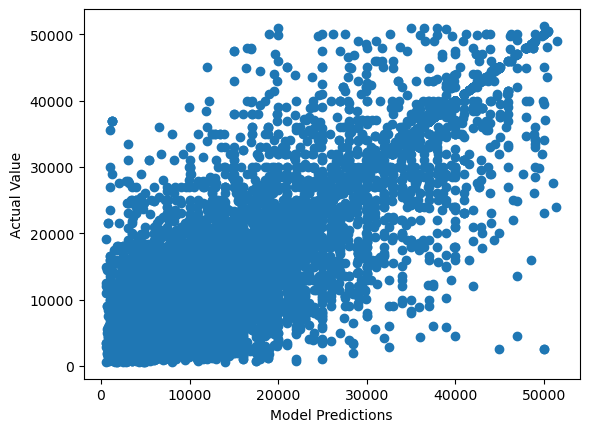

In [38]:
y = df['price']
X = df1.drop(['price'],axis=1)

dtModel2 = make_pipeline(
  PolynomialFeatures(),
  StandardScaler(),
  DecisionTreeRegressor())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
dtModel2.fit(X_train,y_train)

y_pred = dtModel2.predict(X_test)
plt.scatter(y_pred,y_test)
plt.xlabel('Model Predictions')
plt.ylabel('Actual Value')


In [39]:
m2Stats = {
    'MAE':metrics.mean_absolute_error(y_test, y_pred),
    'MSE':metrics.mean_squared_error(y_test, y_pred),
    'RMSE':np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
    'R2E':metrics.r2_score(y_test, y_pred)
}
m2Stats

{'MAE': 2760.412129388404,
 'MSE': 26880290.85050017,
 'RMSE': 5184.620608154484,
 'R2E': 0.8096572025248573}

### Stochastic Gradient Descent Regression

Text(0, 0.5, 'Actual Value')

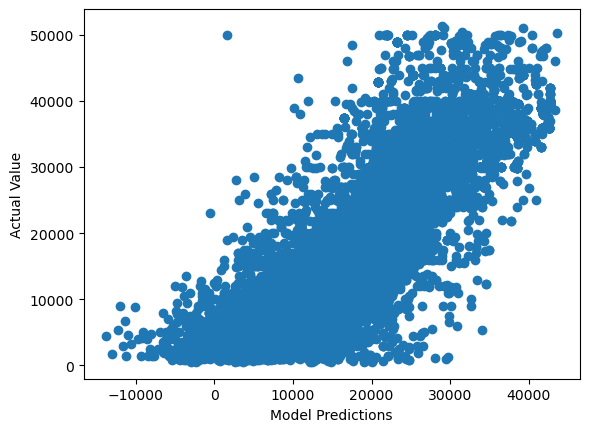

In [40]:
from sklearn.linear_model import SGDRegressor

scaler = StandardScaler()
y = df['price']
X = df1.drop(['price'],axis=1)

dtModel3 = make_pipeline(
  PolynomialFeatures(),
  StandardScaler(),
  SGDRegressor())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
dtModel3.fit(X_train,y_train)

y_pred = dtModel3.predict(X_test)

plt.scatter(y_pred,y_test)
plt.xlabel('Model Predictions')
plt.ylabel('Actual Value')


In [41]:
m3Stats = {
    'MAE':metrics.mean_absolute_error(y_test, y_pred),
    'MSE':metrics.mean_squared_error(y_test, y_pred),
    'RMSE':np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
    'R2E':metrics.r2_score(y_test, y_pred)
}
m3Stats

{'MAE': 4203.569944333582,
 'MSE': 33800899.865627974,
 'RMSE': 5813.854131781083,
 'R2E': 0.7572304194214123}

Text(0, 0.5, 'Actual Value')

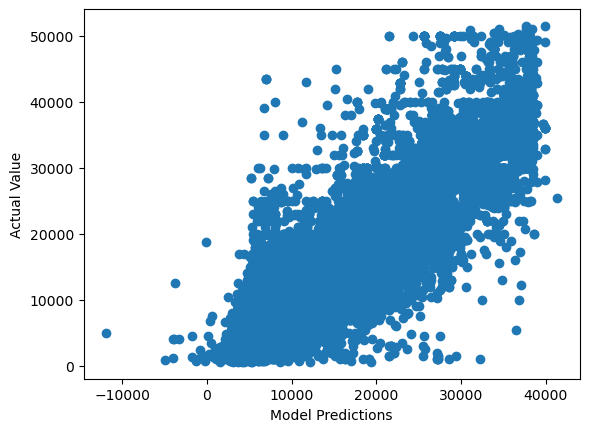

In [42]:
from sklearn.linear_model import LinearRegression

y = df['price']
X = df1.drop(['price'],axis=1)

dtModel4 = make_pipeline(
  PolynomialFeatures(degree=5),
  StandardScaler(),
  LinearRegression())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
dtModel4.fit(X_train,y_train)

y_pred = dtModel4.predict(X_test)

plt.scatter(y_pred,y_test)
plt.xlabel('Model Predictions')
plt.ylabel('Actual Value')

In [43]:
m4Stats = {
    'MAE':metrics.mean_absolute_error(y_test, y_pred),
    'MSE':metrics.mean_squared_error(y_test, y_pred),
    'RMSE':np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
    'R2E':metrics.r2_score(y_test, y_pred)
}
m4Stats

{'MAE': 3577.040406859582,
 'MSE': 26901474.267797578,
 'RMSE': 5186.663114932141,
 'R2E': 0.8085907075957052}

Tried a few methods, first one turned out to be the way to go 👍